In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
custom_palette = {
    "ER": "#1f77b4",      # Blue color
    "BER": "#ff7f0e",     # Orange color
    "PER": "#2ca02c",     # Green color
    "PBER": "#d62728"     # Red color
}

In [3]:
data_path = "./jade_all_filtered.csv"

/tmp/ipykernel_27920/3333808226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time(h)"] = data["time_total_s"] / 3600
/tmp/ipykernel_27920/3333808226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = (data["time(h)"] // window_size) * window_size
/tmp/ipykernel_27920/3333808226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

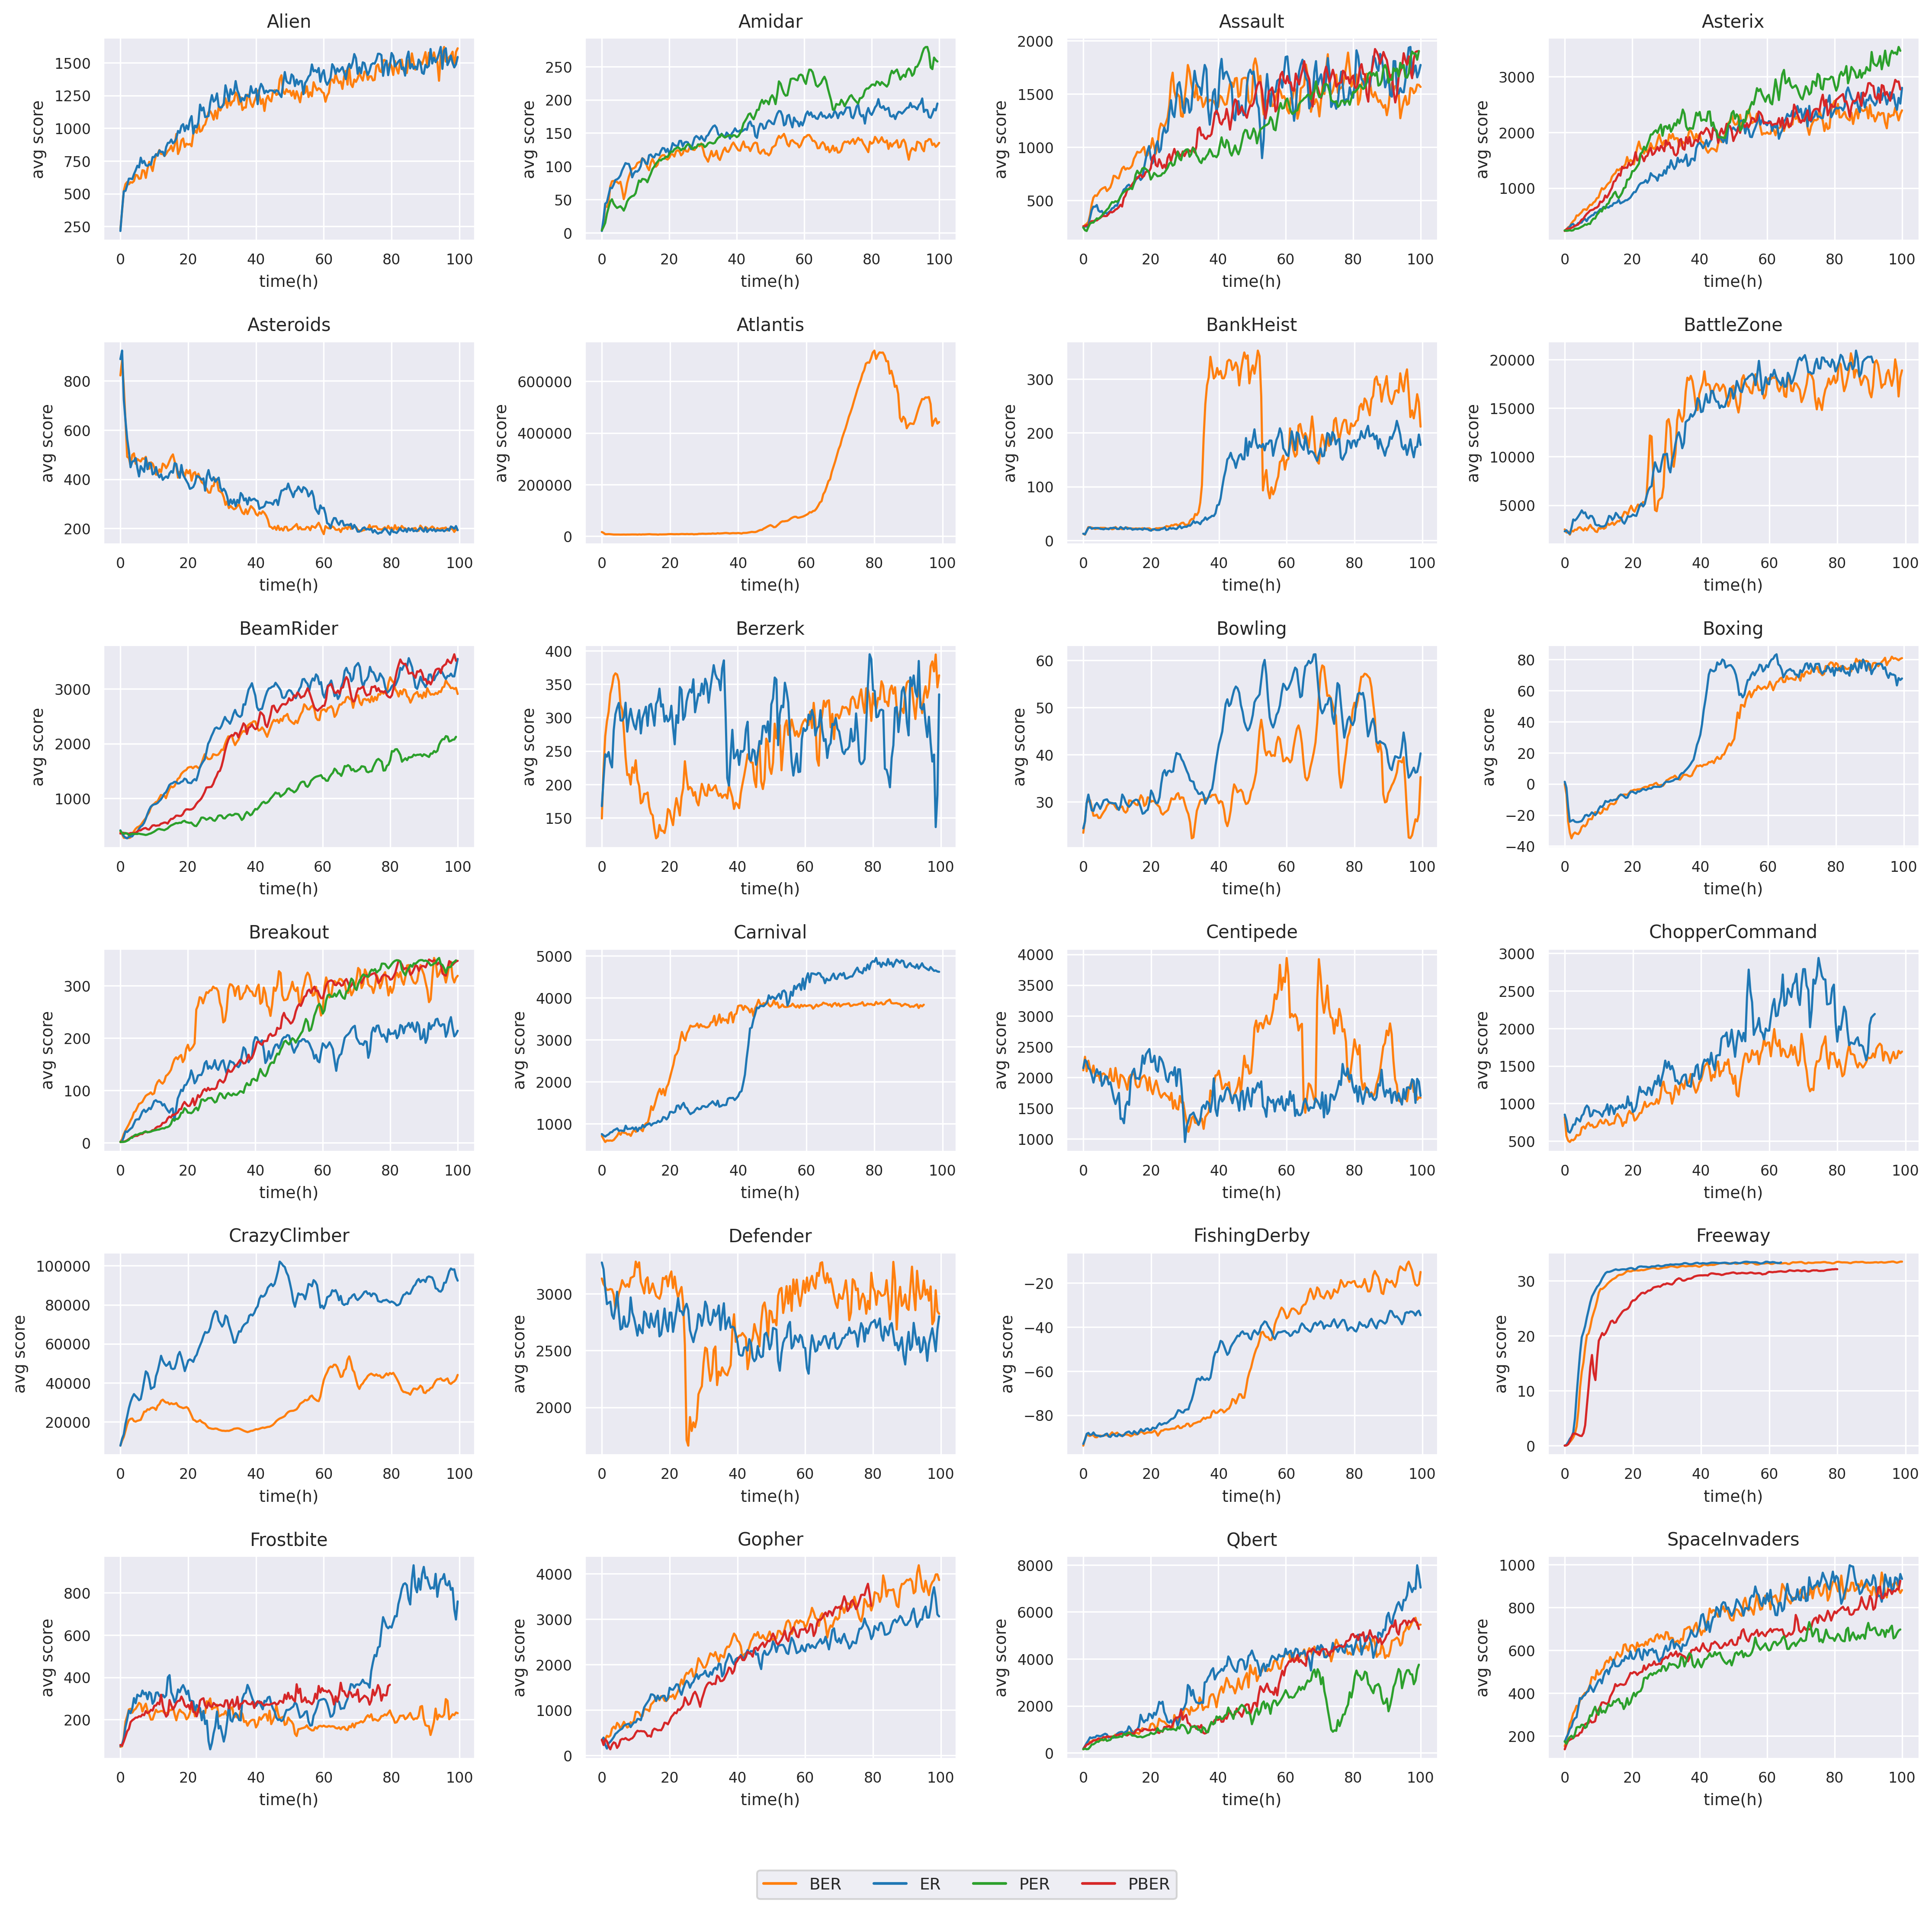

In [4]:
data_df = pd.read_csv(data_path)

# Filter the environments
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 0.25

def compute_rolling_mean(data, window_size=0.5):
    data["time(h)"] = data["time_total_s"] / 3600
    data["time_group"] = (data["time(h)"] // window_size) * window_size
    smoothed_data = data.groupby(["time_group", "buffer"])["episode_reward_mean"].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

fig, axes = plt.subplots(6, 4, figsize=(15, 16), dpi=300)
axes = axes.reshape(-1)
all_lines = []
all_labels = []

for ax_n, (env, data) in enumerate(smoothed_sampler.items()):
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=data.iloc[:-2,], ax=axes[ax_n], palette=custom_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("time(h)", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Collect legend data for each subplot
    handles, labels = ax.get_legend_handles_labels()
    all_lines.extend(handles)  
    all_labels.extend(labels)  
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Create a unique set of legend labels and their corresponding lines
unique_labels, unique_lines = zip(*dict(zip(all_labels, all_lines)).items())
fig.legend(unique_lines, unique_labels, loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=len(unique_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.15)
plt.show()

/tmp/ipykernel_27920/2430474522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = (data["num_env_steps_sampled"] // window_size) * window_size
/tmp/ipykernel_27920/2430474522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = data["time_group"] * 4
/tmp/ipykernel_27920/2430474522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

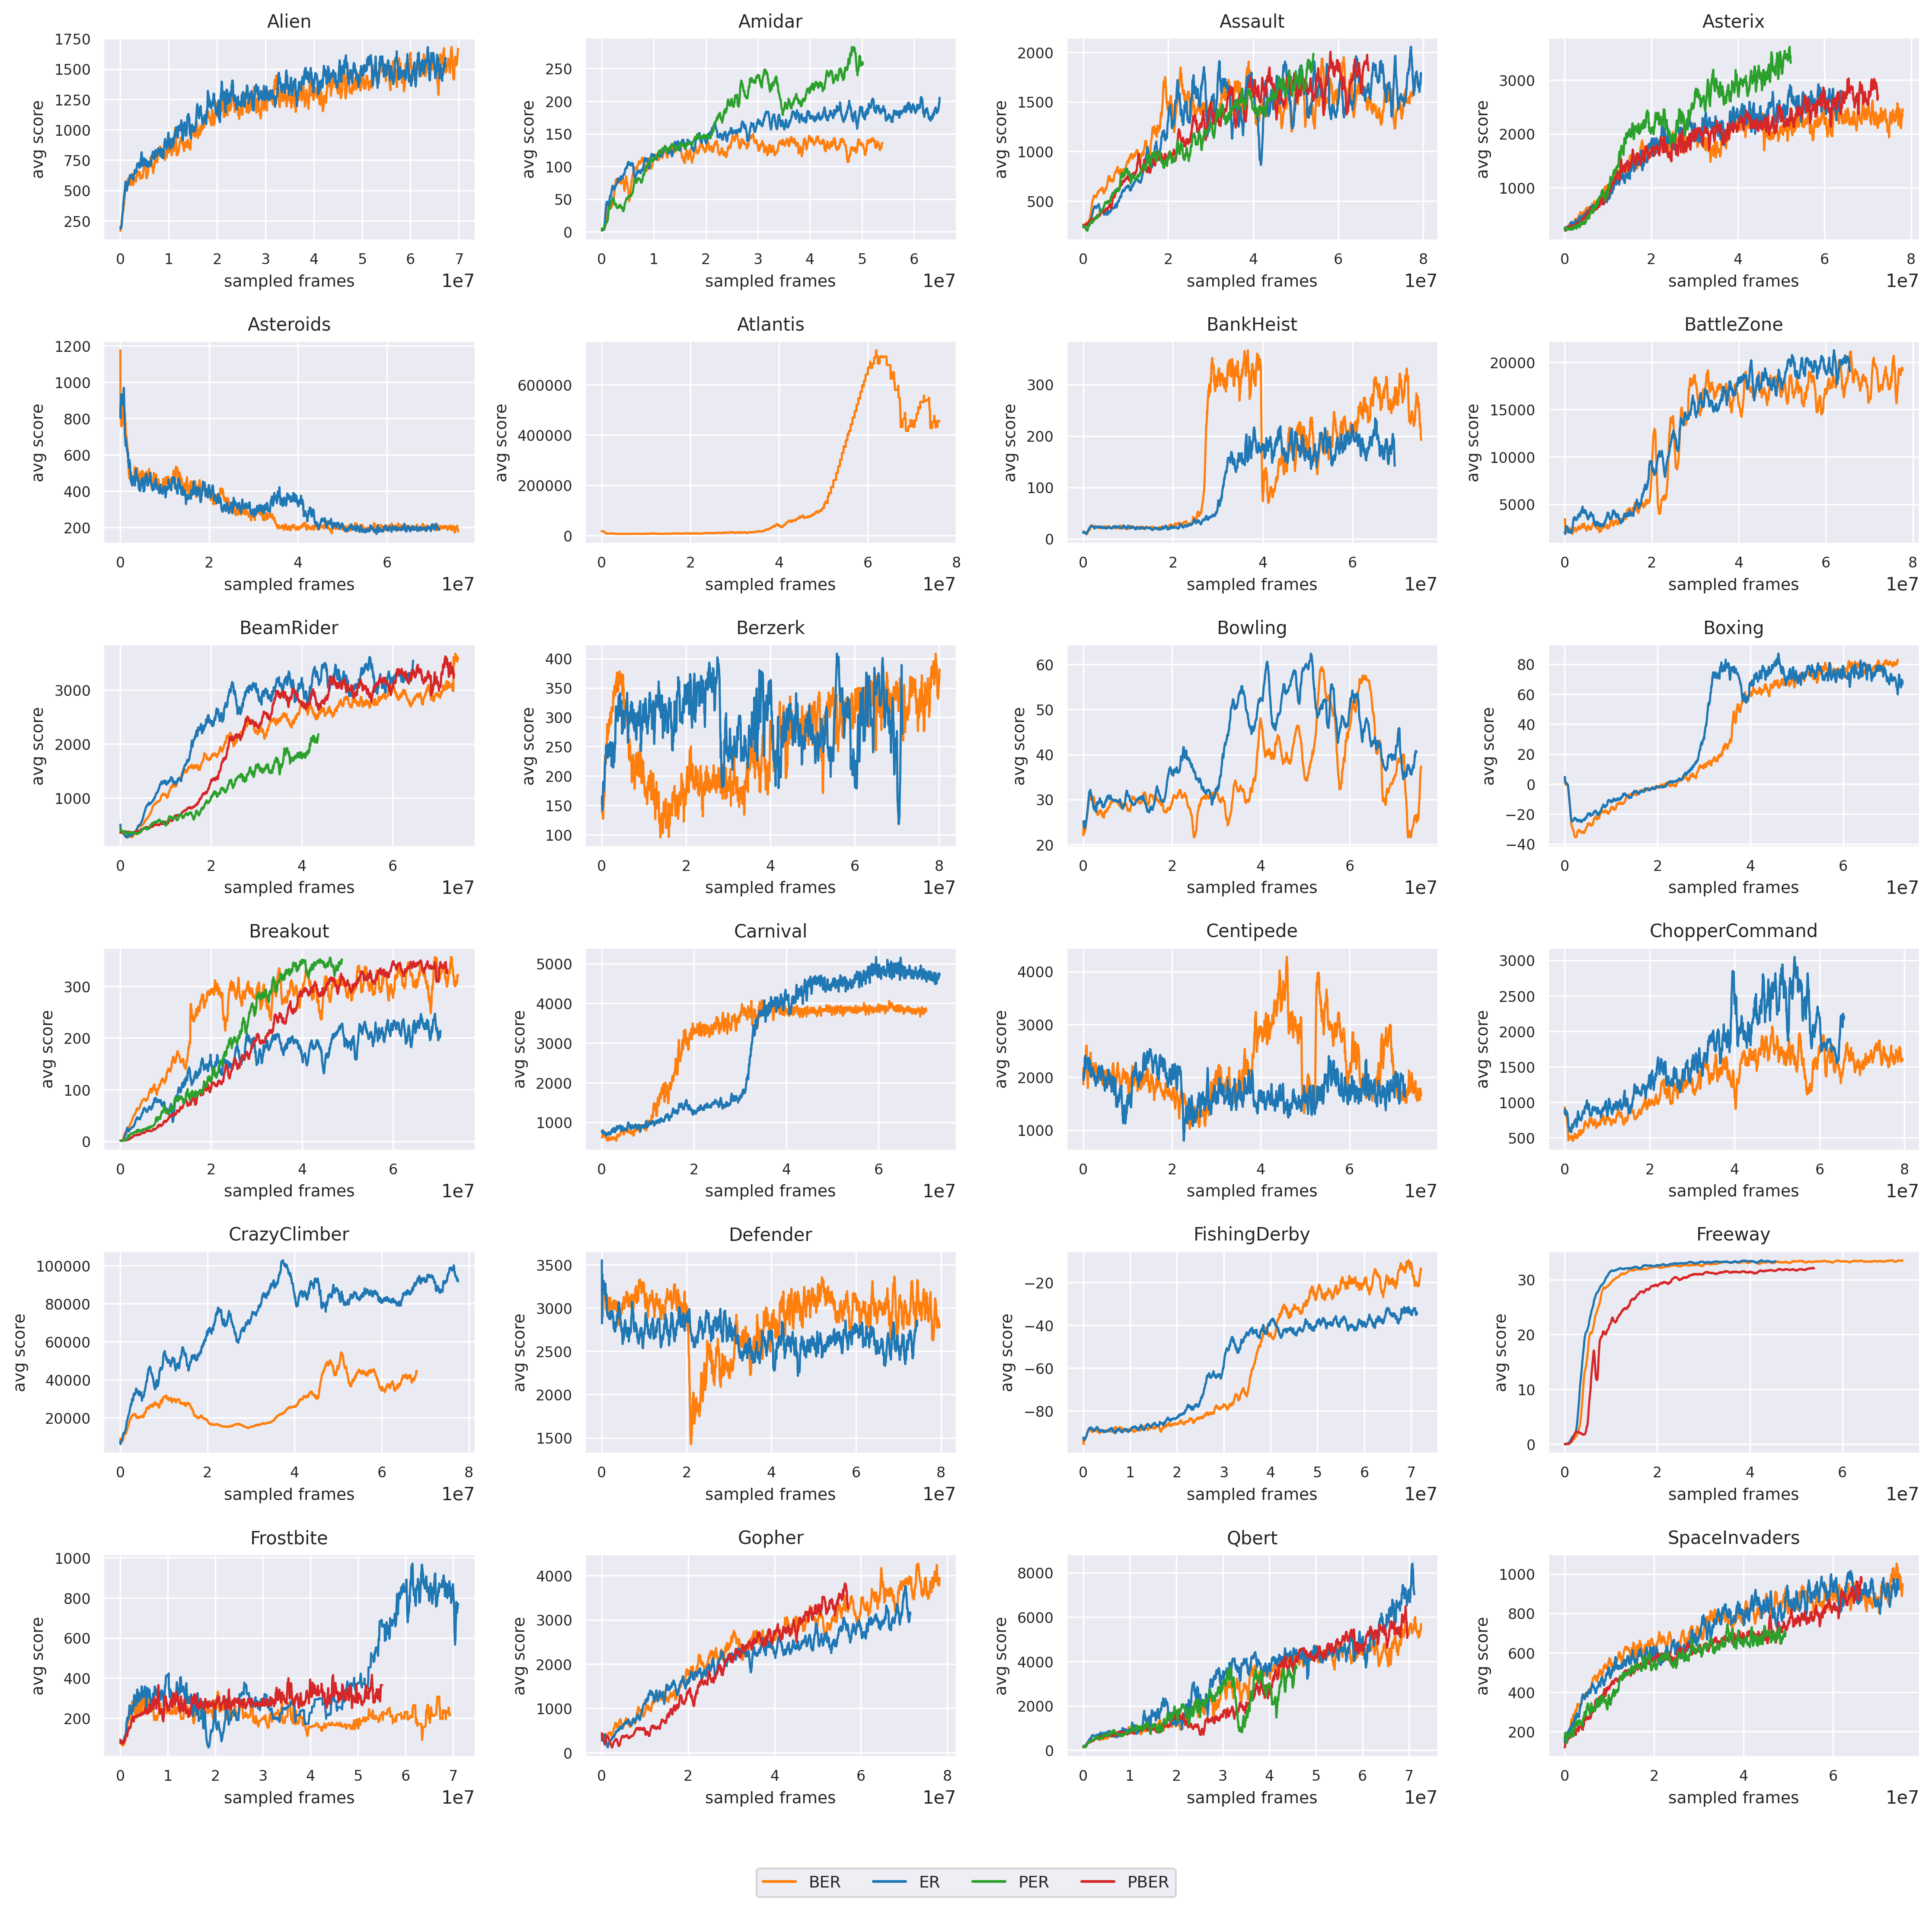

In [5]:
data_df = pd.read_csv(data_path)

# Filter the environments
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 50000

def compute_rolling_mean(data, window_size=0.5):
    data["time_group"] = (data["num_env_steps_sampled"] // window_size) * window_size
    data["time_group"] = data["time_group"] * 4
    smoothed_data = data.groupby(["time_group", "buffer"])[["episode_reward_mean"]].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

fig, axes = plt.subplots(6, 4, figsize=(15, 16), dpi=300)
axes = axes.reshape(-1)
all_lines = []
all_labels = []

for ax_n, (env, data) in enumerate(smoothed_sampler.items()):
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=data.iloc[:-2,], ax=axes[ax_n], palette=custom_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("sampled frames", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Collect legend data for each subplot
    handles, labels = ax.get_legend_handles_labels()
    all_lines.extend(handles)
    all_labels.extend(labels)
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Create a unique set of legend labels and their corresponding lines
unique_labels, unique_lines = zip(*dict(zip(all_labels, all_lines)).items())
fig.legend(unique_lines, unique_labels, loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=len(unique_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.15)
plt.show()

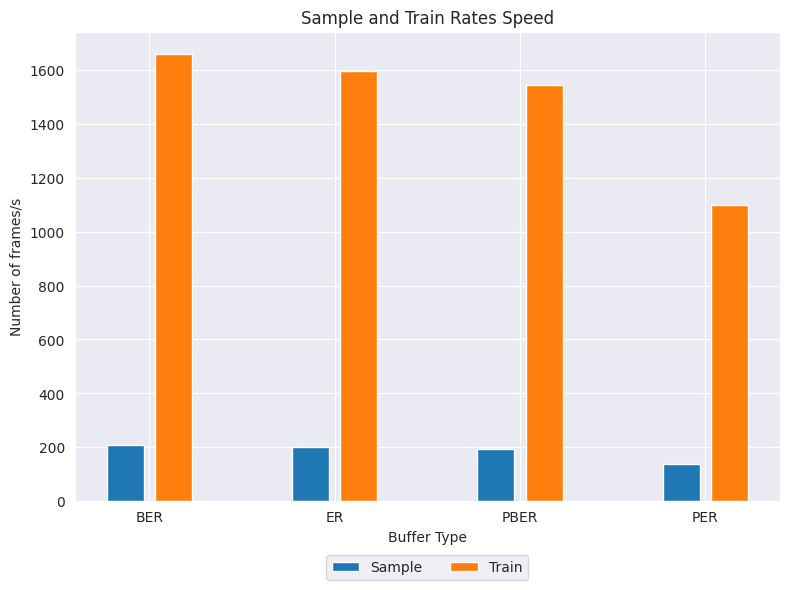

In [6]:
data_df = pd.read_csv(data_path)
data_df = data_df.copy()
# data_df = data_df[data_df["num_env_steps_sampled"] <= 400000]

colors = ["#1f77b4", "#ff7f0e"]

# Add observe column
data_df["num_env_steps_sampled"] = data_df["num_env_steps_sampled"] * 4
data_df["num_env_steps_trained"] = data_df["num_env_steps_trained"] * 4

# Filter only numeric columns for mean calculation
numeric_columns = data_df.select_dtypes(include=[np.number]).columns.tolist()
mean_values_filtered = data_df.groupby(['env', 'buffer'])[numeric_columns].mean().reset_index()

# Calculate the sample and train rates
mean_values_filtered["sample_rate"] = mean_values_filtered["num_env_steps_sampled"] / mean_values_filtered["time_total_s"]
mean_values_filtered["train_rate"] = mean_values_filtered["num_env_steps_trained"] / mean_values_filtered["time_total_s"]

# Aggregate rates across environments and then across buffer types
mean_rates_filtered = mean_values_filtered.groupby(['buffer', 'env'])[['sample_rate', 'train_rate']].mean().reset_index()
mean_rates_final = mean_rates_filtered.groupby('buffer')[['sample_rate', 'train_rate']].mean().reset_index()

plt.figure(figsize=(8, 6), dpi=100)
positions_B_final = range(len(mean_rates_final['buffer']))
plt.bar([p-0.13 for p in positions_B_final], mean_rates_final["sample_rate"], width=0.2, label="Sample", color=colors[0])
plt.bar([p+0.13  for p in positions_B_final], mean_rates_final["train_rate"], width=0.2, label="Train", color=colors[1])

# Adjusting Graph B
plt.xlabel('Buffer Type', fontsize=10)
plt.ylabel('Number of frames/s', fontsize=10)
plt.title('Sample and Train Rates Speed', fontsize=12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(positions_B_final, mean_rates_final['buffer'])
plt.tight_layout()
plt.show()

In [10]:
data_df = pd.read_csv(data_path)
n = 20
window_size_hours = 0.25
data_df["time(h)"] = data_df["time_total_s"] / 3600

# 2. Define helper functions

def apply_offsets_to_data(data):
    recommended_offsets = {
        'Boxing': 20,
        'Pong': 21,
        'FishingDerby': 100,
        'Frostbite': 5,
        'Enduro': 10,
        'Q*bert': 0
    }
    for env, min_reward in data.groupby('env')['episode_reward_mean'].min().items():
        if env not in recommended_offsets and min_reward < 0:
            recommended_offsets[env] = abs(min_reward) + 1
    data['episode_reward_mean'] = data.apply(lambda row: row['episode_reward_mean'] + recommended_offsets.get(row['env'], 0), axis=1)
    return data

def compute_interval_mean_with_env(env_data):
    env_name = env_data['env'].iloc[0]
    bins = list(np.arange(0, env_data["time(h)"].max() + window_size_hours, window_size_hours))
    env_data["time_interval"] = pd.cut(env_data["time(h)"], bins, labels=bins[:-1], right=False)
    numeric_cols = env_data.select_dtypes(include=[np.number]).columns.tolist()
    interval_data = env_data.groupby('time_interval')[numeric_cols].mean().reset_index()
    interval_data['env'] = env_name
    return interval_data

def compute_avg_reward_last_episodes(env_name, data1, data2, n):
    last_rewards1 = data1[data1['env'] == env_name]['episode_reward_mean'].tail(n).values
    last_rewards2 = data2[data2['env'] == env_name]['episode_reward_mean'].tail(n).values
    avg_reward1 = last_rewards1.mean()
    avg_reward2 = last_rewards2.mean()
    return avg_reward1, avg_reward2

def compute_T_save_for_env(env_name, data1, data2):
    rewards1 = data1[data1['env'] == env_name]['episode_reward_mean'].values
    rewards2 = data2[data2['env'] == env_name]['episode_reward_mean'].values
    if len(rewards1) == 0 or len(rewards2) == 0:
        return None
    times1 = data1[data1['env'] == env_name]['time(h)'].values
    times2 = data2[data2['env'] == env_name]['time(h)'].values
    time_diff_ratios = []
    max_reward = max(rewards1.max(), rewards2.max())
    reward_samples = np.linspace(0, max_reward, 51)
    for target_reward in reward_samples:
        time1 = next((times1[i] for i, r in enumerate(rewards1) if r >= target_reward), None)
        time2 = next((times2[i] for i, r in enumerate(rewards2) if r >= target_reward), None)
        if time1 is not None and time2 is not None:
            time_diff_ratio = (time1 - time2) / time1
            time_diff_ratios.append(time_diff_ratio)
    return np.median(time_diff_ratios) if time_diff_ratios else None

# 3. Main data processing and analysis steps

# Sort data by time
data_df_sorted = data_df.sort_values(by=["env", "time(h)"])
# Apply offsets to the data
data_df_sorted = apply_offsets_to_data(data_df_sorted)

# Split sorted data for ER vs. BER and PER vs. PBER
er_data_sorted = data_df_sorted[data_df_sorted['buffer'] == 'ER']
ber_data_sorted = data_df_sorted[data_df_sorted['buffer'] == 'BER']
per_data_sorted = data_df_sorted[data_df_sorted['buffer'] == 'PER']
pber_data_sorted = data_df_sorted[data_df_sorted['buffer'] == 'PBER']

# Compute interval mean for each buffer type and environment using sorted data
er_interval_data_sorted = pd.concat([compute_interval_mean_with_env(er_data_sorted[er_data_sorted['env'] == env]) for env in er_data_sorted['env'].unique()])
ber_interval_data_sorted = pd.concat([compute_interval_mean_with_env(ber_data_sorted[ber_data_sorted['env'] == env]) for env in ber_data_sorted['env'].unique()])
per_interval_data_sorted = pd.concat([compute_interval_mean_with_env(per_data_sorted[per_data_sorted['env'] == env]) for env in per_data_sorted['env'].unique()])
pber_interval_data_sorted = pd.concat([compute_interval_mean_with_env(pber_data_sorted[pber_data_sorted['env'] == env]) for env in pber_data_sorted['env'].unique()])

# Compute metrics for ER vs. BER and PER vs. PBER using sorted data
results_sorted = []
for env in data_df_sorted['env'].unique():
    R_improve_er_ber = (ber_interval_data_sorted[ber_interval_data_sorted['env'] == env]["episode_reward_mean"].median() - er_interval_data_sorted[er_interval_data_sorted['env'] == env]["episode_reward_mean"].median()) / ber_interval_data_sorted[ber_interval_data_sorted['env'] == env]["episode_reward_mean"].median()
    R_improve_per_pber = (pber_interval_data_sorted[pber_interval_data_sorted['env'] == env]["episode_reward_mean"].median() - per_interval_data_sorted[per_interval_data_sorted['env'] == env]["episode_reward_mean"].median()) / pber_interval_data_sorted[pber_interval_data_sorted['env'] == env]["episode_reward_mean"].median()

    
    T_save_er_ber = compute_T_save_for_env(env, er_data_sorted, ber_data_sorted)
    T_save_per_pber = compute_T_save_for_env(env, per_data_sorted, pber_data_sorted)
    
    avg_er_reward, avg_ber_reward = compute_avg_reward_last_episodes(env, er_data_sorted, ber_data_sorted, n)
    avg_per_reward, avg_pber_reward = compute_avg_reward_last_episodes(env, per_data_sorted, pber_data_sorted, n)
    
    improvement_percentage_er_ber = ((avg_ber_reward - avg_er_reward) / avg_er_reward)  if avg_er_reward != 0 else np.nan
    improvement_percentage_per_pber = ((avg_pber_reward - avg_per_reward) / avg_per_reward)  if avg_per_reward != 0 else np.nan
    
    results_sorted.append({
        'Environment': env,
        'R_improve_ER_BER': R_improve_er_ber,
        'R_improve_PER_PBER': R_improve_per_pber,
        'T_save_ER_BER': T_save_er_ber,
        'T_save_PER_PBER': T_save_per_pber,
        'Improvement_ER_BER': improvement_percentage_er_ber,
        'Improvement_PER_PBER': improvement_percentage_per_pber
    })

# Convert results to a DataFrame and compute mean values
result_df_sorted = pd.DataFrame(results_sorted).set_index('Environment')

/tmp/ipykernel_27920/4232938490.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_data["time_interval"] = pd.cut(env_data["time(h)"], bins, labels=bins[:-1], right=False)
/tmp/ipykernel_27920/4232938490.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_data["time_interval"] = pd.cut(env_data["time(h)"], bins, labels=bins[:-1], right=False)
/tmp/ipykernel_27920/4232938490.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [11]:
def remove_outliers_and_compute_mean(column_data):
    # Compute IQR
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers
    filtered_data = column_data[~((column_data < (Q1 - 1.5 * IQR)) | (column_data > (Q3 + 1.5 * IQR)))]
    
    # Compute mean
    return filtered_data.mean()

# Apply the function on each column
filtered_means = result_df_sorted.apply(remove_outliers_and_compute_mean)
filtered_means.name = "Normalized"
filtered_means_df = pd.DataFrame(filtered_means).T
filtered_means_df = pd.concat([result_df_sorted, filtered_means_df])
filtered_means_df

R_improve_ER_BER  R_improve_PER_PBER  T_save_ER_BER  \
Alien                  -0.054645                 NaN      -0.063130   
Amidar                 -0.285214                 NaN      -0.193054   
Assault                -0.035102            0.186514       0.073598   
Asterix                 0.000791           -0.120422       0.417033   
Asteroids              -0.470427                 NaN       0.177940   
Atlantis                     NaN                 NaN            NaN   
BankHeist               0.154600                 NaN       0.157786   
BattleZone              0.048550                 NaN       0.100041   
BeamRider              -0.210339            0.580521       0.144830   
Berzerk                -0.066845                 NaN       0.124098   
Bowling                -0.329864                 NaN      -0.263370   
Boxing                 -0.833118                 NaN      -0.243913   
Breakout                0.376323            0.187687       0.483558   
Carnival               -0.043367                 NaN       0.340786   
Centipede               0.126403                 NaN       0.003425   
ChopperCommand         -0.154698                 NaN      -0.091841   
CrazyClimber           -1.770096                 NaN      -2.181148   
Defender                0.105439                 NaN       0.072226   
FishingDerby           -0.296366                 NaN      -0.299096   
Freeway                 0.003990                 NaN      -0.247367   
Frostbite              -0.427898                 NaN       0.157797   
Gopher                  0.138898                 NaN       0.180981   
Qbert                  -0.179728            0.194549      -0.060479   
SpaceInvaders          -0.003209            0.089908       0.167965   
Normalized             -0.076319            0.164665       0.051810   

                T_save_PER_PBER  Improvement_ER_BER  Improvement_PER_PBER  
Alien                       NaN            0.061171                   NaN  
Amidar                      NaN           -0.314740                   NaN  
Assault                0.184592           -0.058181              0.014161  
Asterix                0.020073           -0.115126             -0.178119  
Asteroids                   NaN           -0.038239                   NaN  
Atlantis                    NaN                 NaN                   NaN  
BankHeist                   NaN            0.263550                   NaN  
BattleZone                  NaN           -0.046998                   NaN  
BeamRider              0.491295           -0.079629              0.691523  
Berzerk                     NaN            0.420003                   NaN  
Bowling                     NaN           -0.181898                   NaN  
Boxing                      NaN            0.150869                   NaN  
Breakout               0.208810            0.463597              0.001129  
Carnival                    NaN           -0.182712                   NaN  
Centipede                   NaN           -0.080338                   NaN  
ChopperCommand              NaN           -0.242838                   NaN  
CrazyClimber                NaN           -0.549821                   NaN  
Defender                    NaN            0.031186                   NaN  
FishingDerby                NaN            0.237344                   NaN  
Freeway                     NaN            0.006858                   NaN  
Frostbite                   NaN           -0.672483                   NaN  
Gopher                      NaN            0.261977                   NaN  
Qbert                  0.324946           -0.296136              0.519947  
SpaceInvaders          0.214098           -0.066936              0.340295  
Normalized             0.233111           -0.016229              0.231489

In [12]:
def generate_refined_combined_latex_table(df1, df2):
    header = "\\begin{tabular}{" + "l" + "c"*df1.shape[1] + "c"*df2.shape[1] + "}\n\\toprule"
    
    # Headers with formatted names
    column_names_1 = ["$" + col.split("_")[0] + "_{" + col.split("_")[1] + "}$" for col in df1.columns]
    column_names_2 = ["$" + col.split("_")[0] + "_{" + col.split("_")[1] + "}$" for col in df2.columns]
    combined_columns = column_names_1 + column_names_2
    
    rows = [" & \\multicolumn{3}{c}{ER vs BER} & \\multicolumn{3}{c}{PER vs PBER} \\\\ \\cmidrule(lr){2-4} \\cmidrule(lr){5-7}"]
    rows.append(" & ".join([""] + combined_columns) + " \\\ \midrule")
    
    for index, (row1, row2) in enumerate(zip(df1.iterrows(), df2.iterrows())):
        combined_row = list(row1[1].values) + list(row2[1].values)
        rows.append("{} & {}".format(row1[0], " & ".join(["{:.4f}".format(val) for val in combined_row])) + " \\\ ")
    
    footer = "\\bottomrule\n\\end{tabular}"
    return header + "\n" + "\n".join(rows) + "\n" + footer
# Splitting the dataframe into two: ER vs BER and PER vs PBER

columns_er_ber = ["R_improve_ER_BER", "T_save_ER_BER", "Improvement_ER_BER"]
columns_per_pber = ["R_improve_PER_PBER", "T_save_PER_PBER", "Improvement_PER_PBER"]

df_er_ber = filtered_means_df[columns_er_ber]
df_per_pber = filtered_means_df[columns_per_pber]
df_er_ber.columns = ["R_improve_ER_BER", "T_save_ER_BER", "R_last_ER_BER"]
df_per_pber.columns = ["R_improve_PER_PBER", "T_save_PER_PBER", "R_last_PER_PBER"]
combined_latex_table = generate_refined_combined_latex_table(df_er_ber, df_per_pber)
print(combined_latex_table)

\begin{tabular}{lcccccc}
\toprule
 & \multicolumn{3}{c}{ER vs BER} & \multicolumn{3}{c}{PER vs PBER} \\ \cmidrule(lr){2-4} \cmidrule(lr){5-7}
 & $R_{improve}$ & $T_{save}$ & $R_{last}$ & $R_{improve}$ & $T_{save}$ & $R_{last}$ \\ \midrule
Alien & -0.0546 & -0.0631 & 0.0612 & nan & nan & nan \\ 
Amidar & -0.2852 & -0.1931 & -0.3147 & nan & nan & nan \\ 
Assault & -0.0351 & 0.0736 & -0.0582 & 0.1865 & 0.1846 & 0.0142 \\ 
Asterix & 0.0008 & 0.4170 & -0.1151 & -0.1204 & 0.0201 & -0.1781 \\ 
Asteroids & -0.4704 & 0.1779 & -0.0382 & nan & nan & nan \\ 
Atlantis & nan & nan & nan & nan & nan & nan \\ 
BankHeist & 0.1546 & 0.1578 & 0.2635 & nan & nan & nan \\ 
BattleZone & 0.0486 & 0.1000 & -0.0470 & nan & nan & nan \\ 
BeamRider & -0.2103 & 0.1448 & -0.0796 & 0.5805 & 0.4913 & 0.6915 \\ 
Berzerk & -0.0668 & 0.1241 & 0.4200 & nan & nan & nan \\ 
Bowling & -0.3299 & -0.2634 & -0.1819 & nan & nan & nan \\ 
Boxing & -0.8331 & -0.2439 & 0.1509 & nan & nan & nan \\ 
Breakout & 0.3763 & 0.4836 & 0.4